In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset/placement.csv')
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.shape

(1000, 3)

<AxesSubplot:xlabel='placement_exam_marks', ylabel='Density'>

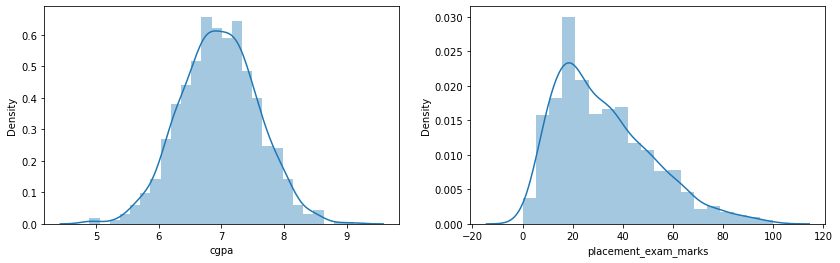

In [4]:
fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

sns.distplot(df['cgpa'], ax=ax1)

sns.distplot(df['placement_exam_marks'], ax=ax2)

So after watching these plots this is confirm that i can apply the **Z-score** method on **cgpa** feature because this is **normally distributed** that's why z-score method is better for it

## Z-Score
Z-scores can quantify the unusualness of an observation when your data follow the normal distribution. Z-scores are the number of standard deviations above and below the mean that each value falls.

<img src="dataset/Outlierimg.png" />
Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

In a more technical term, Z-score tells how many standard deviations away a given observation is from the mean. For example, a Z score of 2.5 means that the data point is 2.5 standard deviation far from the mean. And since it is far from the center, it's flagged as an outlier/anomaly.

In [5]:
print("Mean value of cgpa is ",df['cgpa'].mean())
print("std value of cgpa is ",df['cgpa'].std())
print("min value of cgpa is ",df['cgpa'].min())
print("max value of cgpa is ",df['cgpa'].max())

Mean value of cgpa is  6.96124000000001
std value of cgpa is  0.6158978751323894
min value of cgpa is  4.89
max value of cgpa is  9.12


In [6]:
# finding the boundary values
print("Highest allowed ",df['cgpa'].mean()+3*df['cgpa'].std())
print("Lowest allowed ",df['cgpa'].mean()-3*df['cgpa'].std())

Highest allowed  8.808933625397177
Lowest allowed  5.113546374602842


In [7]:
# Finding the outliers
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [8]:
# these are the outliers who's are out of allowed range so now i should remove them
# so there are two methods to remove the outliers one is trimming and the other method is capping

# Trimming

In [9]:
# in the trimming we drop all of the values which are fall out side the allowed range
# so i create a new df without outliers
# Trimming
new_df = df[(df['cgpa'] < 8.8089) & (df['cgpa'] > 5.1135)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [10]:
new_df.shape # so here 5 rows are removed those were outliers

(995, 3)

In [11]:
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [12]:
# approach 2
# in this approach i have done the trimming by using z-score formula
df['cgpa_zscore'] = (df['cgpa']-df['cgpa'].mean())/df['cgpa'].std()
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [13]:
# now i only take those values which have the z-score among -3 to 3
df[df['cgpa_zscore'] > 3] # how many values are greater than 3rd(Q3) quartile or > 3 value

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [14]:
df[df['cgpa_zscore'] < -3] # how many values are less than 1st(Q1) quartile or < -3 value

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [15]:
# so the total 5 values are my outliers in the dataset

In [16]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)] # So there are total 5 outliers

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [18]:
new_df2 = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]
new_df2

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping

In [19]:
# In this method i try to convert the maximum and minimum values from

upper_limit = df['cgpa'].mean()+3*df['cgpa'].std() # upper boundry
lower_limit = df['cgpa'].mean()-3*df['cgpa'].std() # lower boundry

In [20]:
upper_limit

8.808933625397177

In [21]:
lower_limit

5.113546374602842

In [22]:
# np.where(x,y,z) here x=condition, y=what i do if the condition is true, z=what i do if the condition becomes false

In [24]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
        upper_limit, 
    np.where(
    df['cgpa'] < lower_limit,
    lower_limit,
    df['cgpa']))

In [25]:
df['cgpa'].max()

8.808933625397177

In [26]:
df['cgpa'].min()

5.113546374602842

In [27]:
df.shape

(1000, 4)

In [29]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64

These are two techniques for handling **Outliers** but for those techniques there is a **restriction** that they **only works** for **Normal Distributed Data**.